
> > > > dataFram3NYC() now reading csv with file path below
> > >  C:\Users\DENVER\Desktop\interviewPY\INT_03_PYTHON_PANDAS_NYC_COLLISION\NYPD_Motor_Vehicle_Collisions.csv

{0: 'DATE', 1: 'TIME', 2: 'BOROUGH', 3: 'ZIP CODE', 4: 'LATITUDE', 5: 'LONGITUDE', 6: 'LOCATION', 7: 'ON STREET NAME', 8: 'CROSS STREET NAME', 9: 'OFF STREET NAME', 10: 'NUMBER OF PERSONS INJURED', 11: 'NUMBER OF PERSONS KILLED', 12: 'NUMBER OF PEDESTRIANS INJURED', 13: 'NUMBER OF PEDESTRIANS KILLED', 14: 'NUMBER OF CYCLIST INJURED', 15: 'NUMBER OF CYCLIST KILLED', 16: 'NUMBER OF MOTORIST INJURED', 17: 'NUMBER OF MOTORIST KILLED', 18: 'CONTRIBUTING FACTOR VEHICLE 1', 19: 'CONTRIBUTING FACTOR VEHICLE 2', 20: 'CONTRIBUTING FACTOR VEHICLE 3', 21: 'CONTRIBUTING FACTOR VEHICLE 4', 22: 'CONTRIBUTING FACTOR VEHICLE 5', 23: 'UNIQUE KEY', 24: 'VEHICLE TYPE CODE 1', 25: 'VEHICLE TYPE CODE 2', 26: 'VEHICLE TYPE CODE 3', 27: 'VEHICLE TYPE CODE 4', 28: 'VEHICLE TYPE CODE 5'}

> > > focusDataframer(columns2keep_list = [indexNo_a

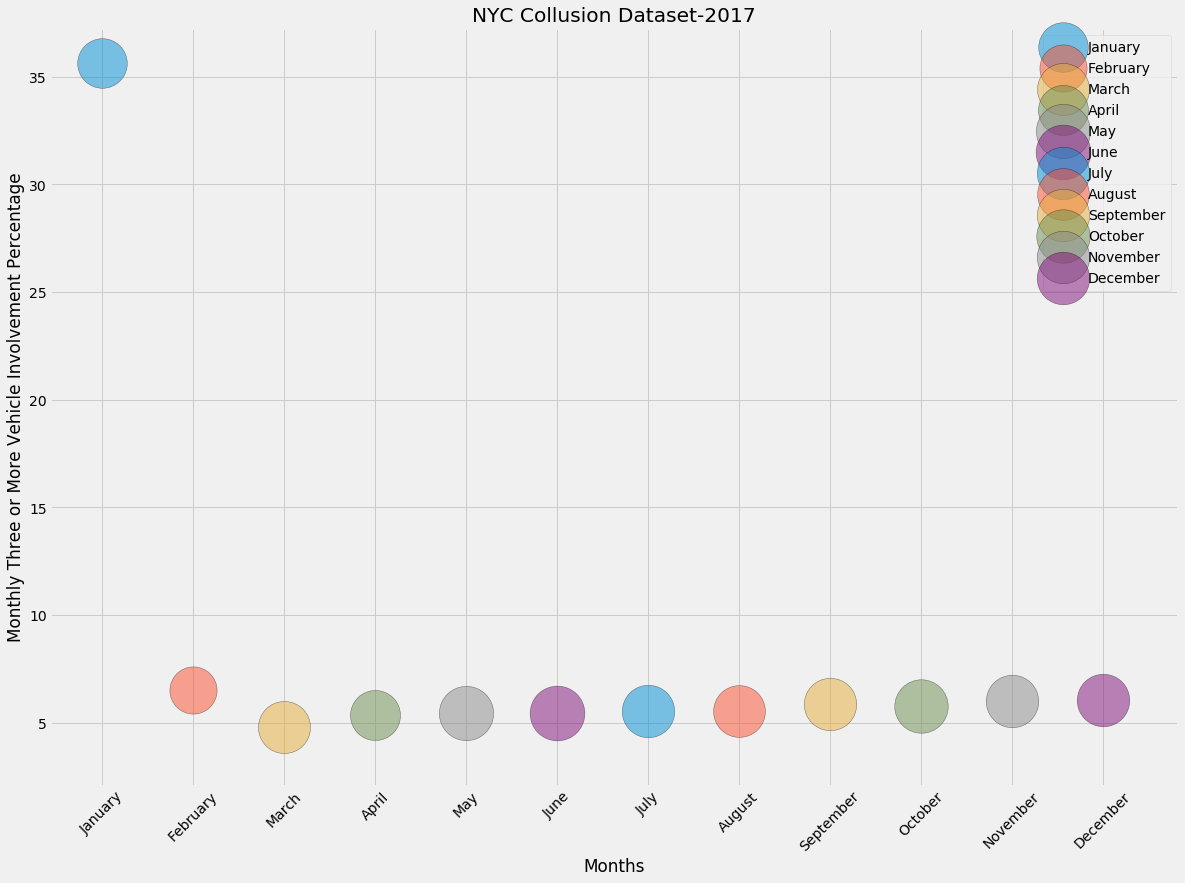

In [38]:
# Q-7: Do winter driving conditions lead to more multi-car collisions?
# * Compute the rate of multi car collisions as the proportion of the number of collisions involving 3 or more cars to the total number of collisions for each month of 2017.
# * Calculate the chi-square test statistic for testing whether a collision is more likely to involve 3 or more cars in January than in May.
from NYPD_functions import (
    dataFram3NYC,
    focusDataframer,
    dateFilterMyDataFrame,
    addMonthFilterByYearMyDF,
    monthNamesLister
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import warnings
warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')


def solution07of08():
    """
    Q-7: Do winter driving conditions lead to more multi-car collisions?
    * Compute the rate of multi car collisions as the proportion of the number of collisions
    involving 3 or more cars to the total number of collisions for each month of 2017.
    * Calculate the chi-square test statistic for testing whether a collision is more likely to involve 3 or more cars in January than in May.
    """
    questionSevenCol_list = [
        column_number for column_number in range(24, 29)
    ]
    questionSevenCol_list.append(0)


    def addMonthFilterByYearMyDF(focus_df=focusDataframer(questionSevenCol_list), date_column_label='DATE', bring_all_records_for='2017'):
        """
        REQUIRES A DATAFRAME, COLUMN NAME THAT HAS DATE OF EACH RECORD, 
        ADDS A COLUMN BY NAME 'ye4r' WITH FOUR DIGIT YEAR 'YYYY' STRING AS VALUES
        """
        pass
        print()
        print('> > > dateFilterMyDataFrame() filtering all records by year : ' +
              bring_all_records_for)
    #     focus_df = focusDataframer()
        focus_df['ye4r'] = [
            date[-4:] for date in focus_df['DATE']
        ]
        filtered_by_year_df = focus_df.loc[focus_df['ye4r']
                                           == bring_all_records_for]
        filtered_by_year_df['m0nth'] = [date[:2]
                                        for date in filtered_by_year_df[date_column_label]]
        return filtered_by_year_df.drop(columns=[date_column_label, 'ye4r'])


    def monthNamesLister(months_in_numbers_list=np.arange(12)):
        """ RETURNS LIST OF FULL NAMES OF MONTHS GIVEN AS 01 OR 02 OR 03 ETC"""
        monthNames_list = [
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ]
        monthsNumber_list = np.arange(12)
        monthNames_dict = dict(zip(monthsNumber_list, monthNames_list))
        out_list = [
            monthNames_dict[integerMonth]
            for integerMonth in list(months_in_numbers_list)
        ]
        return out_list


    def finalDataFram3r(focusAddMonth_df=addMonthFilterByYearMyDF(bring_all_records_for='2017')):
        vehiclesOnly_df = focusAddMonth_df.groupby('m0nth').count()
        gr0uped_df = vehiclesOnly_df.copy()
        collusionTotal2017_num = focusAddMonth_df.count()[-1]
        vehicleColumns_list = list(gr0uped_df.columns)
        gr0uped_df['singleCarOnly'] = [
            int(first - second)
            for first, second
            in zip(gr0uped_df[vehicleColumns_list[0]], gr0uped_df[vehicleColumns_list[1]])
        ]
        gr0uped_df['twoCarsOnly'] = [
            int(first - second)
            for first, second
            in zip(gr0uped_df[vehicleColumns_list[1]], gr0uped_df[vehicleColumns_list[2]])
        ]
        # at least one vehicle involved
        gr0uped_df['numTotalMonthly'] = [
            int(minimum_one_car)
            for minimum_one_car
            in gr0uped_df[vehicleColumns_list[0]]
        ]
        final_df = gr0uped_df[['singleCarOnly',
                               'twoCarsOnly',
                               'numTotalMonthly']]
        final_df['threeCarsAndMore'] = [int(total) - int(single + double) for total, single, double in zip(final_df['numTotalMonthly'], final_df['singleCarOnly'], final_df['twoCarsOnly'])
                                        ]
        return final_df.drop(columns=['singleCarOnly', 'twoCarsOnly'])

    # Q-7: Do winter driving conditions lead to more multi-car collisions?
    # * Compute the rate of multi car collisions as the proportion of the number of collisions involving 3 or more cars to the total number of collisions for each month of 2017.


    def fin4lPerctgDataFramer(
        final_df=finalDataFram3r(
            focusAddMonth_df=addMonthFilterByYearMyDF(
                bring_all_records_for='2017'))):

        percentage_df = final_df.copy()
        percentage_df['percMonthly'] = [
            float(threecars/totalnum*100).__round__(2)
            for threecars, totalnum
            in zip(percentage_df['threeCarsAndMore'], percentage_df['numTotalMonthly'])
        ]

        return percentage_df.drop(columns='threeCarsAndMore')


    def bubbleMultiCarInv(
        multiCarInvPerc_df=fin4lPerctgDataFramer()
    ):
        """
        CREATES A BUBBLE CHART WITH BUBBLE SIZE PROPORTIONATE TO MONTHLY COLLUSION COUNT
        """
        plt.figure(figsize=(18, 13))
        plt.title('BUBBLE CHART: ZIP CODE VS COLLUSION-PER-SQ-KM-2017')
        plt.title('NYC Collusion Dataset-2017')
        plt.ylabel('Monthly Three or More Vehicle Involvement Percentage')
        plt.xlabel('Months')
        perc_list = multiCarInvPerc_df['percMonthly']
        num4size_list = multiCarInvPerc_df['numTotalMonthly']
        m0nthFancy_l1st = monthNamesLister()
        monthFancy_list = [
            month + ': {:,}'.format(numCollusion)
            for month, numCollusion in zip(m0nthFancy_l1st, num4size_list)
        ]

        for month, percentage, numTotal in zip(m0nthFancy_l1st, perc_list, num4size_list):
            lab3l = str(month)
            plt.scatter(
                month, percentage,
                s=3000*numTotal/num4size_list.max(),
                marker='o', edgecolors='black', alpha=0.50,
                label=lab3l
            )
        plt.legend(loc='best')
        fileName2save = 'Q7_MULTI-CAR-COLLUSION-MONTHLY-2017.png'
        plt.savefig(fileName2save)
        plt.xticks(rotation = 45)
        plt.show()
        return None


    bubbleMultiCarInv()

    return None
# Q-7: Do winter driving conditions lead to more multi-car collisions?
# * Calculate the chi-square test statistic for testing whether a
# collision is more likely to involve 3 or more cars in January than in May.